# 통계분석/ [상관 분석 + 히트맵] 타이타닉호 생존율 분석하기

## 1) 데이터 수집

In [1]:
import warnings

warnings.filterwarnings(action='ignore') 

In [2]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
titanic.to_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/03 통계 분석/titanic.csv', index = False)

- 01행 seaborn 패키지를 로드
- 03행 titanic 데이터를 로드
- 04행 데이터를 CSV 파일로 저장

## 2) 데이터 준비

### 2-1 데이터의 기본 정보 탐색하기

In [3]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- 타이타닉 데이터의 기본 정보를 확인

In [4]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

- age 열의 결측값을 중앙값을로 치환한다.
- embarked 열에서 최빈값이 'S'임을 확인한다.

In [5]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

- embarked_town 열에서 결측값을 'southampton'으로 치환한다.
- deck열에서 최빈값이 'C'임을 확인한다.

## 3) 데이터 탐색

### 3-1 데이터의 기본 정보 탐색하기

In [6]:
titanic['deck'] = titanic['deck'].fillna('C')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

- deck열에서 결측값을'C'로 치환한다.
- 타이타닉 데이터에 결측값이 다채워졌는지 확인한다.

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


- 타이타닉 데이터의 기본 정보를 확인

In [8]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

- survived 속성값의 빈도를 확인

### 3-2 차트를 그려 데이터를 시각적으로 탐색하기

#### - 남자 승객과 여자 승객의 생존율을 pie 차트로 그리기

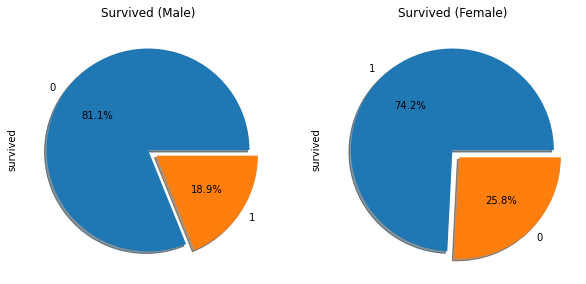

In [9]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1, 2, figsize = (10, 5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

- 01행 차트를 그리기 위해 matplotlib.pyplot를 로드
- 02행 한 줄에 두 개의 차트를 그리도록 하고 크기를 설정
- 03행 첫 번째 pie 차트는 남자 승객의 생존율을 나타내도록 설정
- 04행 두 번째 pie 차트는 여자 승객의 생존율을 나타내도록 설정
- 05행 첫 번째 차트의 제목을 설정
- 06행 두 번째 차트의 제목을 설정
- 07행 구성한 차트를 나타낸다.

#### - 등급별 생존자 수를 차트로 나타내기

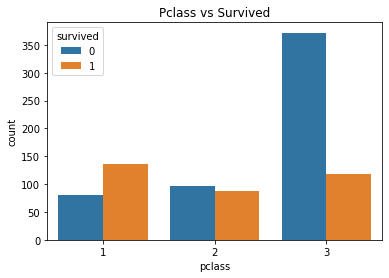

In [10]:
sns.countplot('pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()

- 01행 pclass 유형 1,2,3을 x축으로 하고 survived =0과 survived =1의 개수를 계산하여 y축으로 하는 countplot을 설정
- 02행 차트 제목을 설정
- 03행 구성한 차트를 나타냄

생존자(1)은 1등급에서 가장 많고,사망자(0)은 3등급에서 가장 많음

## 4) 데이터 모델링

### 4-1상관 분석을 위한 상관 계수 구하고 저장하기

In [11]:
titanic_corr = titanic.corr(method = 'pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


- 피어슨 상관 계수를 적용하여 상관 계수를 구함
- 상관 계수를 출력

In [12]:
titanic_corr.to_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/03 통계 분석/titanic_corr.csv',index = False)

- 상관 계수를 CSV 파일로 저장

#### - 특정 변수 사이의 상관 계수 구하기

In [13]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053255

- survived와 adult_male 변수 사이의 상관 계수를 구함

In [14]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849623

- survived와 fare 변수 사이의 상관 계수를 구함

### 4-2 결과 시각화

#### - 산점도로 상관 분석 시각화하기

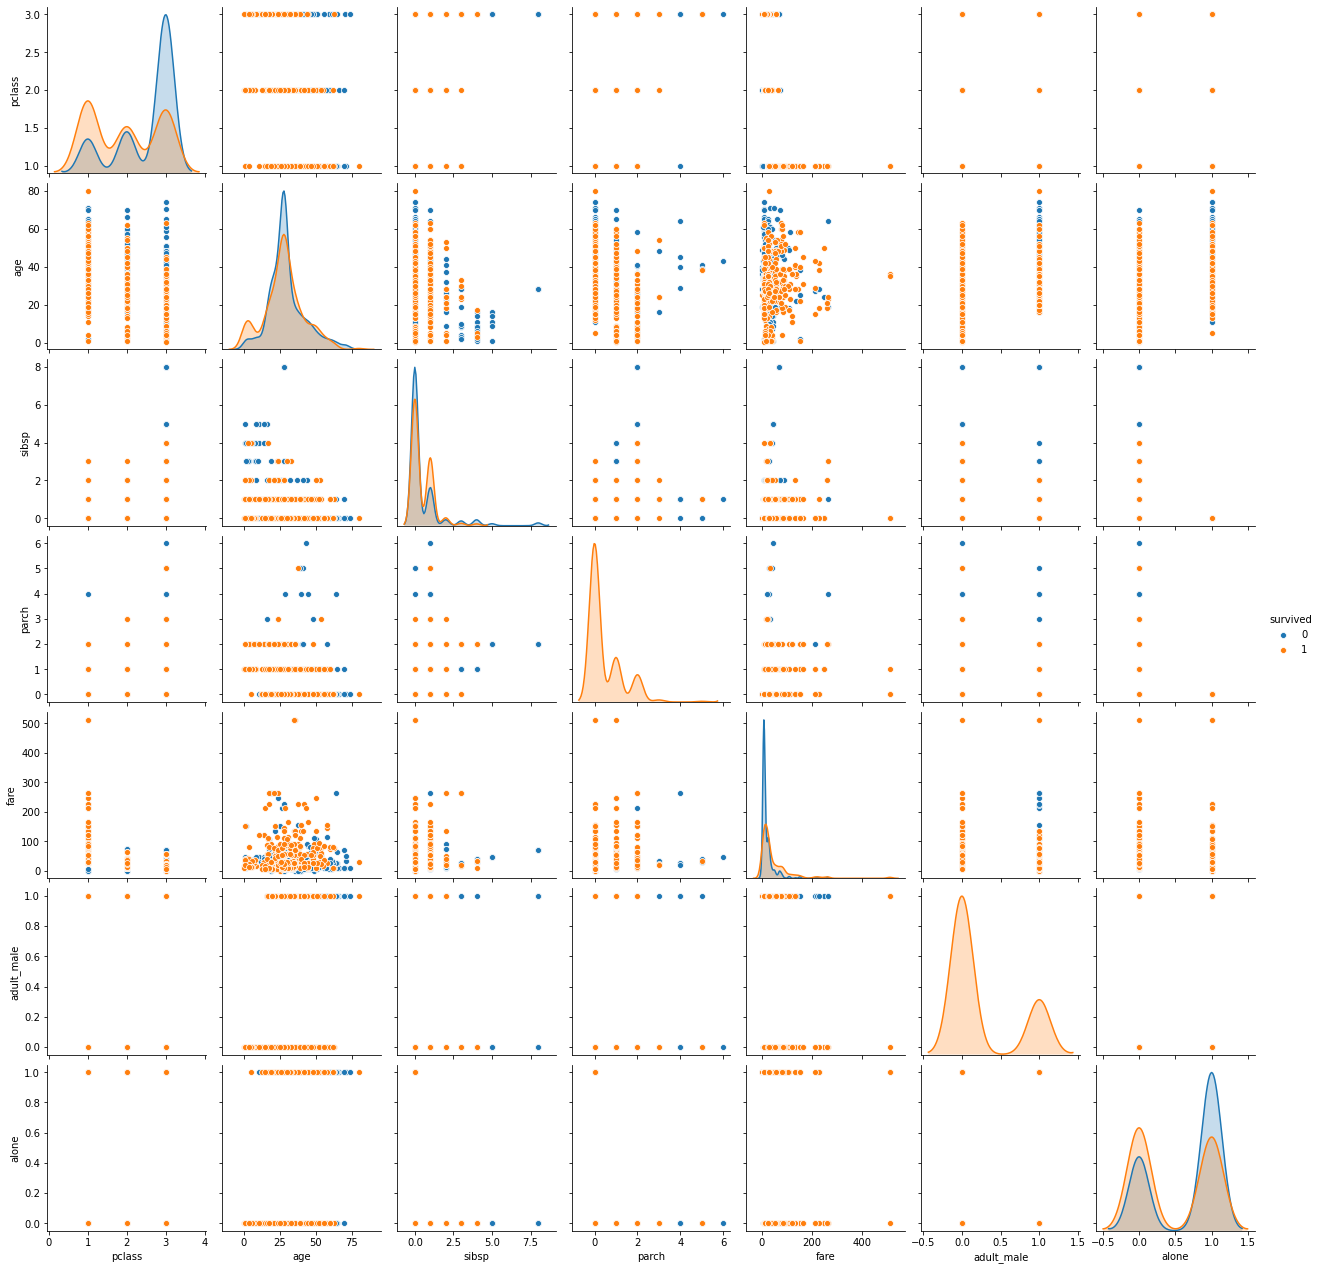

In [15]:
sns.pairplot(titanic, hue = 'survived')
plt.show()

- pairplot() 함수를 사용하여 타이타닉 데이터의 차트를 그림, hue는 종속 변수를 지정
- pairplot을 나타냄

#### - 두 변수의 상관관계 시각화하기

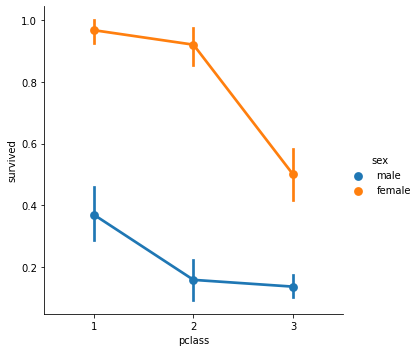

In [17]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()      

- catplot() 함수를 사용하여 pclass와 survived 변수의 관계를 차트로 그림 hue인자를 이용하여 종속 변수를 sex로 지정
- catplot을 나타냄

#### -변수 사이의 상관 계수를 히트맵으로 시각화하기

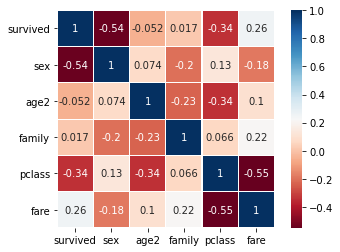

In [18]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.to_csv('C:/Users/Jung Suk Won/파이썬/데이터과학및분석/03 통계 분석/titanic3.csv', index =False)
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass','fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax
= 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,annot_kws = {"size": 10})
plt.show()

- 01행~ 17행 10살 단위로 등급을 나누어 0~7의 값으로 바꿔주는 category_age 함수를 작성
- 19행 category_age 함수를 적용하여 새로운 age2 열을 만들어 추가
- 20행 성별을 male/female에서 1/0으로 치환
- 21행 가족의 수를 구하여 family 열을 추가
- 22행 수정된 데이터프레임을 titanic3.csv로 저장
- 23행 히트맵에 사용할 데이터를 추출
- 24행히트맵에 사용할 색상맵을 지정
- 25행 corr() 함수로 구한 상관 계수로 히트맵을 생성
- 27행 생성한 히트맵을 나타냄